# Proyecto 2. Introducción a la Inteligencia Artificial

*Universidad del Valle*  
*Escuela de Ingeniería de Sistemas y Computación*  
## Autores:
- Juan Felipe Orozco Escobar
- Kevin Andres Dominguez Molina
- Oliver Henao Cardenas
- Jhoam Sebastian Molina

## Objetivo

- Aplicar el concepto de aprendizaje de máquina para resolver un problema de clasificación usando los métodos vistos en el curso.


## Actividades

1. Visite el sitio web de Kaggle y descargue el conjunto de datos con ejemplos de enfermedades de corazón https://www.kaggle.com/ronitf/heart-disease-uci (En este la columna objetivo es target) Deberían usar este.
2. Lea la descripción de los datos cuidadosamente.
3. Crear un notebook de Python (puede ser un kernel de Kaggle o un notebook local en Jupyter).
4. Cargar el conjunto de datos como un dataFrame de pandas. Realizar gráficos para cada una de las variables usando matplotlib. Las variables numéricas deben ser graficadas como histogramas y las variables categóricas deben ser representadas como diagramas de tortas. Luego es importante que previamente haya clasificado las variables en estos 2 grupos. Su visualización debe verse como las imágenes a continuación para sus variables numéricas y categóricas:
  
  
![Tux, the Linux mascot](https://raw.githubusercontent.com/ijuanfe/uv-ai_project2/main/images/example.png)
  
  
5. Complete o remueva los elementos faltantes del conjunto de datos si existen.
6. Divida el conjunto de datos en 2: 80% para entrenamiento y 20% para pruebas
7. Entrene un modelo de árbol de decisión. Ajuste los parámetros necesarios para obtener un buen resultado. Reporte la precisión del modelo para el conjunto de entrenamiento y para el conjunto de prueba. También reporta la matriz de confusión para el conjunto de pruebas.
8. Realice una interpretación del modelo obtenido. Para esto puede imprimir el modelo obtenido por python. ¿Qué tan fácil es?.
9. Repita los pasos 7 y 8 para un modelo Naive Bayes y una Red Neuronal.
10. Compare los resultados de los 3 modelos usados en términos de la precisión, la estabilidad y la interpretabilidad de los resultados.
11. En su opinión, ¿Cuál de los 3 métodos usaría para resolver el problema de predecir enfermedades del corazón y porqué?.

# Let's start!

## Importing some libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from pandas.api.types import CategoricalDtype # Datatype converter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## Importing the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ijuanfe/uv-ai_project2/main/data/heart.csv')

## Printing out some basic information about the dataset

In [3]:
pd.set_option('display.max_columns', None) # Force to "print" all columns
print(df.columns)
print(df.shape)
df.head()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Variables representation and data types of the dataset

* ***age***: age in years
    * Datatype: numerical
        * Float
* ***sex***:
    * Datatype: categorical
        * 0 = female
        * 1 = male
* ***cp***: chest pain
    * Datatype: categorical
        * 1 = typical angina
        * 2 = atypical angina
        * 3 = non-anginal pain
        * 4 = asymptomatic
* ***trestbps***: resting blood pressure (mm Hg)
    * Datatype: numerical
        * Float
* ***chol***: person's cholesterol (mg/dl)
    * Datatype: numerical
        * Float
* ***fbs***: person's fasting blood sugar (mg/dl)
    * Datatype: categorical
        * 0 = <= 120 mg/dl
        * 1 = > 120 mg/dl
* ***restecg***: Resting electrocardiographic result
    * Datatype: categorical
        * 0 = normal
        * 1 = having ST-T wave abnormality
        * 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
* ***thalach***: maximum heart rate achieved
    * Datatype: numerical
        * Float
* ***exang***: exercise induced angina (1 = yes; 0 = no)
    * Datatype: categorical
        * 0 = no
        * 1 = yes
* ***oldpeak***: ST depression induced by exercise relative to rest
    * Datatype: numerical
        * Float
* ***slope***: slope of the peak exercise ST segment
    * Datatype: categorical
        * 1 = upsloping
        * 2 = flat
        * 3 = downsloping
* ***ca***: number of major vessels (0-3) colored by flourosopy
    * Datatype: numerical
        * Float
* ***thal***: blood disorder called thalassemia
    * Datatype: categorial
        * 3 = normal
        * 6 = fixed defect
        * 7 = reversable defect
* ***target***: heart disease
    * Datatype: categorial
        * 0 = no
        * 1 = yes

In [4]:
numerical_data = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categorical_data = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

## A brief description of our dataset

In [5]:
description = df.describe()
description

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Some data visualization
## Numerical data visualization

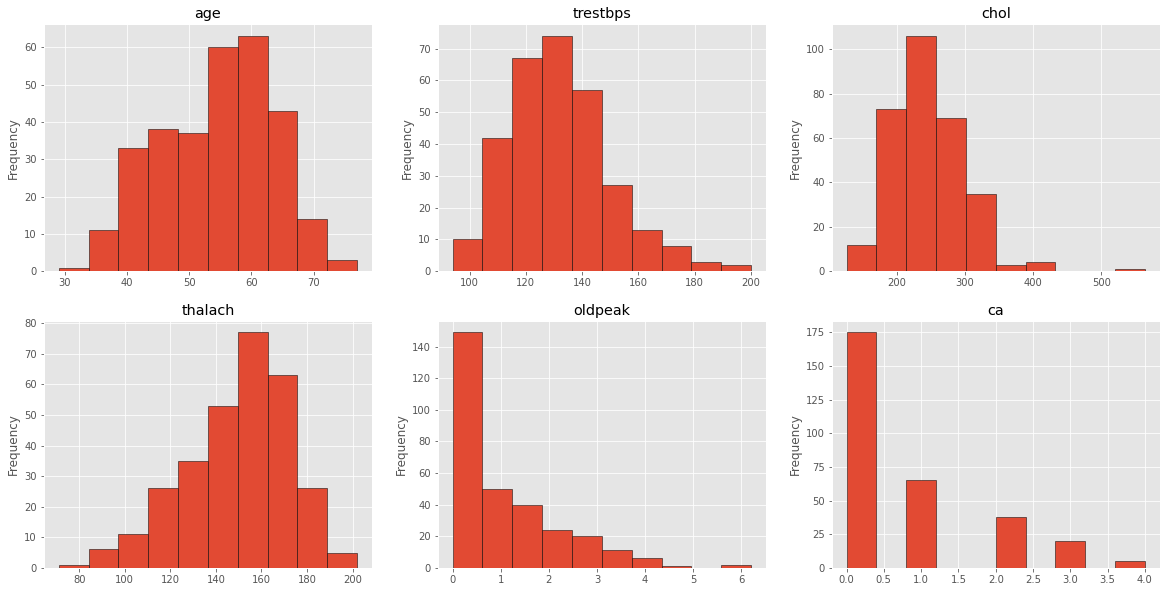

In [6]:
# Numerical data visualization: histograms
fig = plt.figure(figsize=(20, 10))
x = 1
for attr in numerical_data:
    ax = fig.add_subplot(2,3,x)
    
    df[attr].plot(kind='hist', ax=ax, rwidth=1, edgecolor='black')
    plt.title(attr)
    x = x + 1

## Categorical data visualization

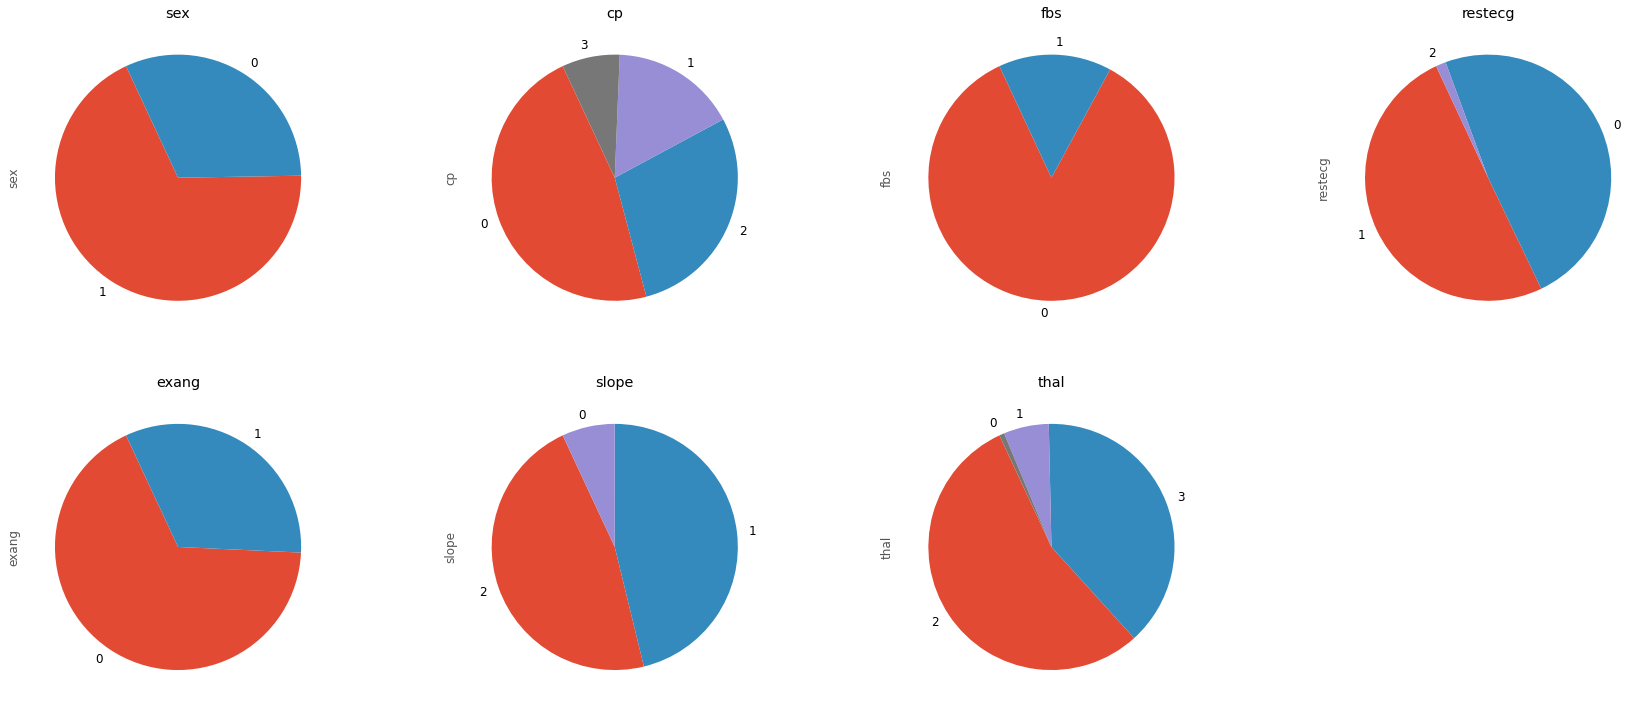

In [7]:
# Categorinal data visualization: pie charts
fig = plt.figure(figsize=(30, 60))
x = 1
for attr in categorical_data:
    ax = fig.add_subplot(9,4,x)
    df[attr].value_counts().plot(kind='pie', ax=ax, startangle=115, fontsize=12)
    plt.title(attr)
    x = x + 1
plt.show()

# Dealing with missing data

IMPORTANT: This dataset doesn't have any missing information, however we described here the steps neccesary to pre-process a dataset in case of missing data

This command allows us to identify data that is incorrectly formatted like blank spaces, NA or even mixture of datatypes (e.g. a column with multiple data types like numbers and letters)


In [8]:
df.dtypes # Print datatype for each column

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

If there is a column which has 'object' datatype then it might have a missing value..

In [9]:
df['age'].unique() # Print all the unique values in the column age

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

If there is question mark '?' then that means it is a missing value. Print out the number of rows that contains those missing values

In [10]:
print(len(df.loc[(df['age'] == '?') | (df['sex'] == '?')]))

0


Now print out those rows (training examples) that contains the missing values

In [11]:
df.loc[(df['age'] == '?') | (df['sex'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Then we have to remove the rows with missing values

In [12]:
df_no_missing_values = df.loc[(df['age'] != '?') & (df['sex'] != '?')]
len(df_no_missing_values)

303

Make sure 'age' and 'sex' no longer contains question marks

In [13]:
df_no_missing_values['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [14]:
df_no_missing_values['sex'].unique()

array([1, 0])

# Formatting the data: splitting the data into dependent and independent variables

- Dependent variable: X --> column data that is used to make the classification
- Independent variable: y --> column data that we want to predict (target: in this case, heart disease)

## Dependent variable X

In [15]:
# Dependent variable X
X = df_no_missing_values.drop('target', axis=1).copy() # X = df_no_missing_values.iloc(:, :-1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Independent variable y

In [16]:
# Independent variable y
y = df_no_missing_values['target'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Categorical data to binary values
To use categorical data with Scikit Learn Decision trees we have to convert categorical data into multiple columns of binary values. The main idea is to treat every number as a separate category that is no more or less similar to any of the other categories.

In [17]:
# Categorical_data with more than 2 categories: cp, restecg, slope, thal
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


## Building the Classificaton Tree Model
First we have to split the data into training and test datasets, then plotting the final tree classifier

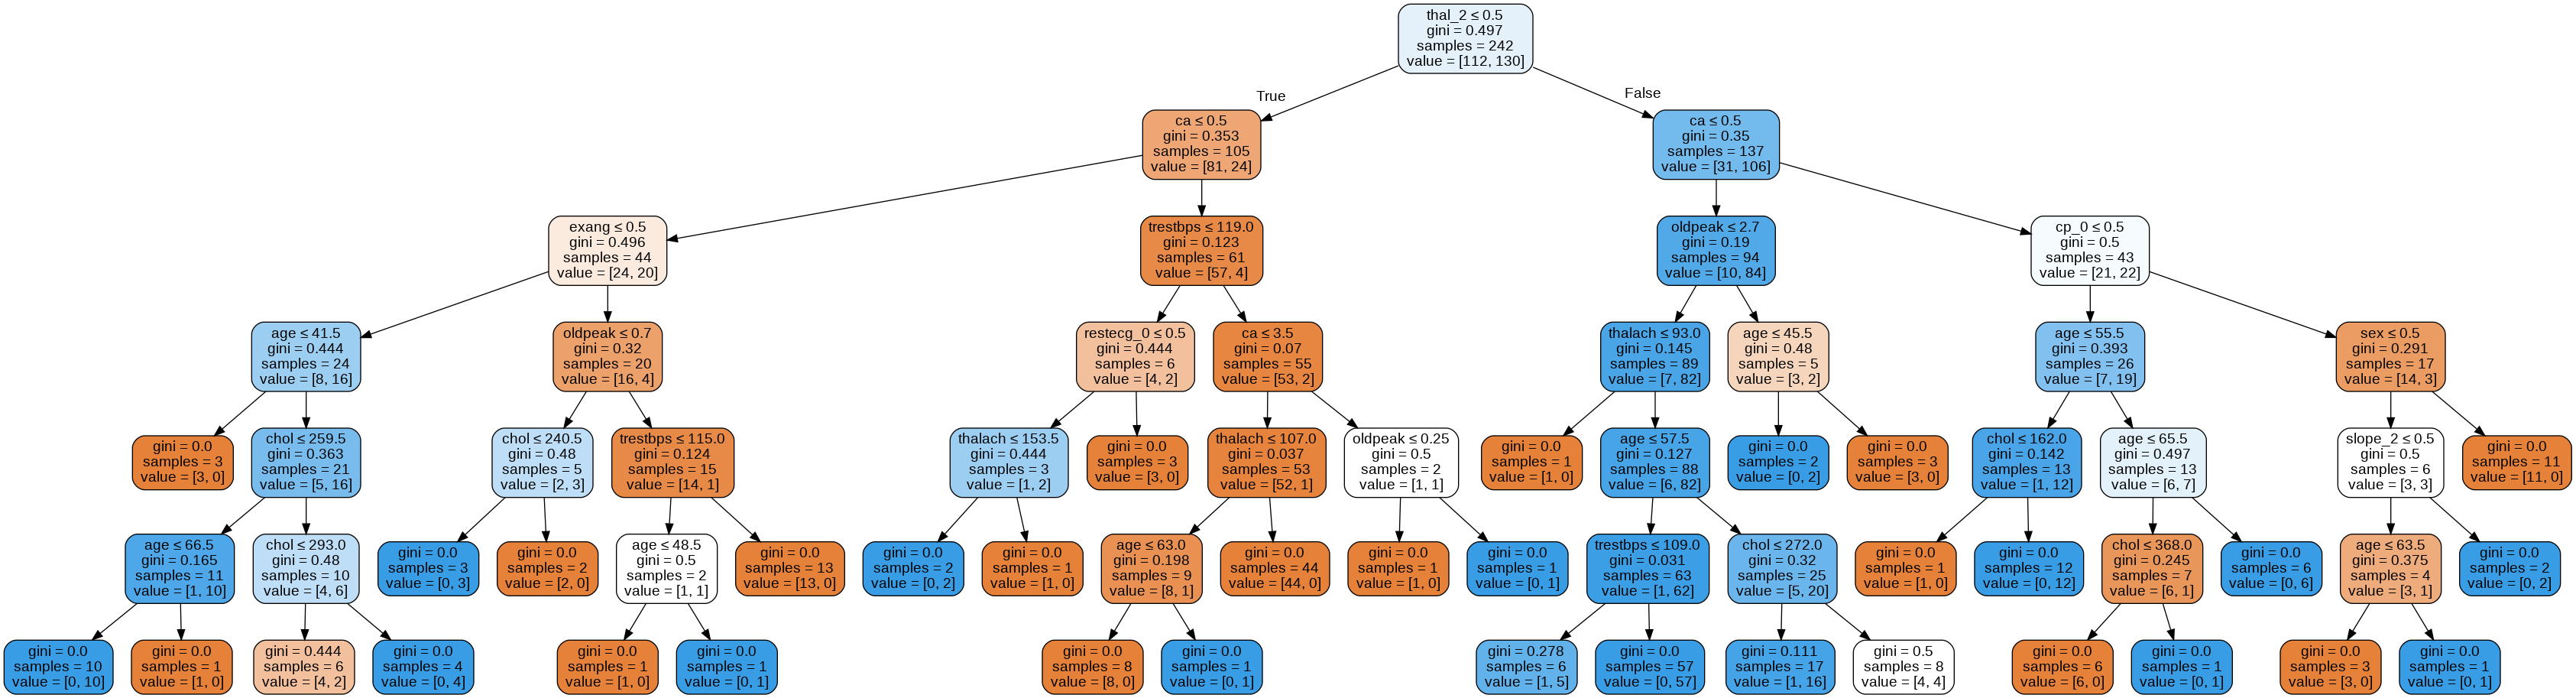

In [18]:
# Spliting the data into training and test sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_encoded, y, train_size = 0.8, test_size = 0.2)
decision_tree_model = DecisionTreeClassifier(max_depth=6)
decision_tree_model = decision_tree_model.fit(X_train_dt, y_train_dt)
# Plotting the final tree classifier
dot_data = StringIO()
export_graphviz(decision_tree_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X_encoded.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Accuracy of the model
What is the accuracy of our model? Let's make some predictions

In [19]:
# Predict the response for training and test dataset
y_train_pred_dt = decision_tree_model.predict(X_train_dt.values) # 80%
y_test_pred_dt = decision_tree_model.predict(X_test_dt.values)   # 20%
# Model accuracy: it tells how often is the classifier correct
print("Accuracy training dataset:", metrics.accuracy_score(y_train_dt, y_train_pred_dt))
print("Accuracy test dataset:", metrics.accuracy_score(y_test_dt, y_test_pred_dt))

Accuracy training dataset: 0.9669421487603306
Accuracy test dataset: 0.7213114754098361


## Decision Tree Confusion matrix
The confusion matrix allow us to evaluate the performance of a classification model

 Confusion matrix for training dataset

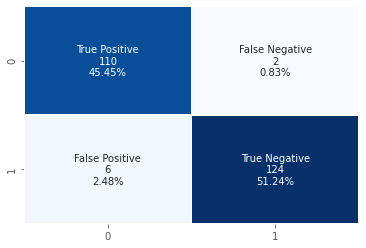

In [20]:
cm_train_dt = confusion_matrix(y_train_dt, y_train_pred_dt)
# print(cm_train_dt)
group_names = ['True Positive','False Negative', 'False Positive', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_train_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_train_dt.flatten()/np.sum(cm_train_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_train_dt, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=.5);

Confusion matrix for test dataset

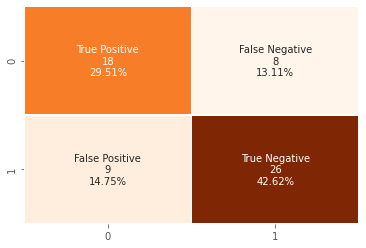

In [21]:
cm_test_dt = confusion_matrix(y_test_dt, y_test_pred_dt)
group_names = ['True Positive','False Negative', 'False Positive', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_test_dt.flatten()/np.sum(cm_test_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_test_dt, annot=labels, fmt='', cmap='Oranges', cbar=False, linewidths=.5);

List of rates for test confusion matrix (Evaluation Metrics)
![Tux, the Linux mascot](https://raw.githubusercontent.com/ijuanfe/uv-ai_project2/main/images/confusion_matrix.png)
(Image source: https://medium.com/@cmukesh8688/evaluation-machine-learning-by-confusion-matrix-a4196051cf8d)

In [22]:
# Total
total = y_test_dt.shape[0]

# Accuracy: Overall, how often is the classifier correct?
# (TP + TN) / total
accuracy = sum(cm_test_dt[i][i] for i in range(2)) / total
print("Accuracy = " + str(accuracy))

# Misclassification Rate: Overall, how often is it wrong?
# - Also known as "Error Rate" and equivalent to 1 minus Accuracy
# (FP + FN) / total
error_rate = (cm_test_dt[1][0] + cm_test_dt[0][1]) / total
print("Error Rate = " + str(error_rate))

# True Positive Rate: When it's actually yes, how often does it predict yes?
# - Also known as "Sensitivity" or "Recall"
# TP / actual yes
Sensitivity = cm_test_dt[0][0] / total
print("Sensitivity = " + str(Sensitivity))
    
# False Positive Rate: When it's actually no, how often does it predict yes?
# FP / actual no
false_positive_rate = cm_test_dt[1][0] / total
print("False Positive Rate = " + str(false_positive_rate))

# True Negative Rate: When it's actually no, how often does it predict no?
# - Also known as "Specificity" and equivalent to 1 minus False Positive Rate
# TN / actual no
Specificity = cm_test_dt[1][1] / total
print("Specificity = " + str(Specificity))

# Precision: When it predicts yes, how often is it correct?
# TP / predicted yes
Precision = cm_test_dt[0][0] / (cm_test_dt[0][0] + cm_test_dt[1][0])
print("Precision = " + str(Precision))

# Prevalence: How often does the yes condition actually occur in our sample?
# actual yes / total
Prevalence = (cm_test_dt[0][0] + cm_test_dt[0][1]) / total
print("Prevalence = " + str(Prevalence))

Accuracy = 0.7213114754098361
Error Rate = 0.2786885245901639
Sensitivity = 0.29508196721311475
False Positive Rate = 0.14754098360655737
Specificity = 0.4262295081967213
Precision = 0.6666666666666666
Prevalence = 0.4262295081967213


# Building the Naive Bayes Model  
Training the model

In [23]:
def BestResult(ent=13, print_intfo=False):
  # k : is the number of variables you want to choose from the total
  # selection of the best characteristics (variables)  
  X=df.drop(['target'], axis=1)
  y=df['target']
    
  best=SelectKBest(k=ent)
  X_new = best.fit_transform(X, y)
  X_new.shape
  selected = best.get_support(indices=True)
  
  used_features = X.columns[selected]
  return used_features, selected

def IntendencyMatrixPlot(used_features):
  colormap = plt.cm.viridis
  sns.set_style("whitegrid")
  plt.figure(figsize=(10,10))
  plt.title('Matrix of Intendency of Variables', y=1.05, size=15)
  sb.heatmap(df[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

used_features, selected = BestResult()
# IntendencyMatrixPlot(used_features)

# The input data is divided into training and test data.

# Split dataset in training and test datasets
X_train_nb, X_test_nb = train_test_split(df, test_size=0.2, random_state=6)
y_train_nb = X_train_nb["target"]
y_test_nb = X_test_nb["target"]

#  Model training
gnb = GaussianNB()
gnb.fit(
    X_train_nb[used_features].values,
    y_train_nb
)

GaussianNB(priors=None, var_smoothing=1e-09)

Making some predictions

In [24]:
y_test_pred_nb = gnb.predict(X_test_nb[used_features])

print("k = ", len(used_features))  
print('\nVariables selected by SelectKBest: ', X.columns[selected])
print('Training Set Accuracy: {:.2f}'
    .format(gnb.score(X_train_nb[used_features], y_train_nb)))
print('Test Set Accuracy: {:.2f}'
    .format(gnb.score(X_test_nb[used_features], y_test_nb)))

k =  13

Variables selected by SelectKBest:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Training Set Accuracy: 0.84
Test Set Accuracy: 0.80


Test confusion matrix

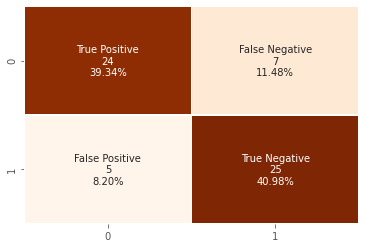

In [25]:
cm_test_nb = confusion_matrix(y_test_nb, y_test_pred_nb)
group_names = ['True Positive','False Negative', 'False Positive', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test_nb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_test_nb.flatten()/np.sum(cm_test_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_test_nb, annot=labels, fmt='', cmap='Oranges', cbar=False, linewidths=.5);

In [26]:
# Total
total = y_test_nb.shape[0]

# Accuracy: Overall, how often is the classifier correct?
# (TP + TN) / total
accuracy = sum(cm_test_nb[i][i] for i in range(2)) / total
print("Accuracy = " + str(accuracy))

# Misclassification Rate: Overall, how often is it wrong?
# - Also known as "Error Rate" and equivalent to 1 minus Accuracy
# (FP + FN) / total
error_rate = (cm_test_nb[1][0] + cm_test_nb[0][1]) / total
print("Error Rate = " + str(error_rate))

# True Positive Rate: When it's actually yes, how often does it predict yes?
# - Also known as "Sensitivity" or "Recall"
# TP / actual yes
Sensitivity = cm_test_nb[0][0] / total
print("Sensitivity = " + str(Sensitivity))
    
# False Positive Rate: When it's actually no, how often does it predict yes?
# FP / actual no
false_positive_rate = cm_test_nb[1][0] / total
print("False Positive Rate = " + str(false_positive_rate))

# True Negative Rate: When it's actually no, how often does it predict no?
# - Also known as "Specificity" and equivalent to 1 minus False Positive Rate
# TN / actual no
Specificity = cm_test_nb[1][1] / total
print("Specificity = " + str(Specificity))

# Precision: When it predicts yes, how often is it correct?
# TP / predicted yes
Precision = cm_test_nb[0][0] / (cm_test_nb[0][0] + cm_test_nb[1][0])
print("Precision = " + str(Precision))

# Prevalence: How often does the yes condition actually occur in our sample?
# actual yes / total
Prevalence = (cm_test_nb[0][0] + cm_test_nb[0][1]) / total
print("Prevalence = " + str(Prevalence))

Accuracy = 0.8032786885245902
Error Rate = 0.19672131147540983
Sensitivity = 0.39344262295081966
False Positive Rate = 0.08196721311475409
Specificity = 0.4098360655737705
Precision = 0.8275862068965517
Prevalence = 0.5081967213114754


# Building the Neural Network Model

In [27]:
# Neural Network model implementation
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import normalize
from keras.optimizers import Adamax
from sklearn import preprocessing

# Scaling the data (normalization)
# min_max_scaler = preprocessing.MinMaxScaler()
# X_scaled = min_max_scaler.fit_transform(X_encoded.values)

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_encoded, y, test_size=0.2)
X_train_nn = normalize(X_train_nn, axis=1)
X_test_nn = normalize(X_test_nn, axis=1)

# Describe the neural network sequentially layer by layer
neural_network_model = Sequential([Dense(32, activation='relu', input_shape=X_train_nn.shape[1:]),
                                   Dense(32, activation='relu'),
                                   Dense(2, activation='sigmoid')])
neural_network_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 1,890
Trainable params: 1,890
Non-trainable params: 0
_________________________________________________________________


Compiling the neural network

In [28]:
neural_network_model.compile(optimizer=Adamax(learning_rate=0.003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training the neural network model

In [29]:
# Train the neural network model
neural_network_model.fit(X_train_nn, y_train_nn, batch_size=32, epochs=1000);
# You should be able to see the loss decrease and the accuracy increase over time

Epoch 1/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.4711
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4711
Epoch 3/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5579
Epoch 4/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5248
Epoch 5/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5289
Epoch 6/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5289
Epoch 7/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5331
Epoch 8/1000
8/8 [==============================] - 0s 991us/step - loss: 0.6864 - accuracy: 0.5744
Epoch 9/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5496
Epoch 10/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5496
Epoch 11/1000
8/8

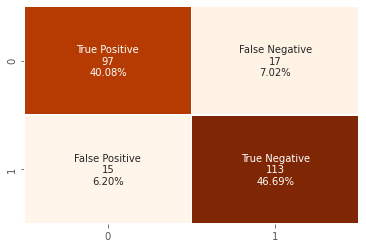

In [30]:
# Confusion matrix training dataset
y_train_pred_nn = neural_network_model.predict(X_train_nn)
cm_train_nn = confusion_matrix(y_train_nn, np.argmax(y_train_pred_nn, axis=-1))
group_names = ['True Positive','False Negative', 'False Positive', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_train_nn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_train_nn.flatten()/np.sum(cm_train_nn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_train_nn, annot=labels, fmt='', cmap='Oranges', cbar=False, linewidths=.5);

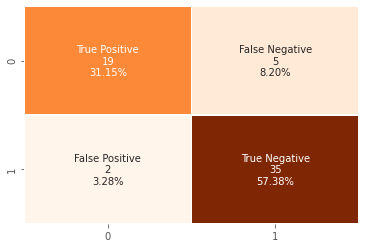

In [31]:
# Confusion matrix test dataset
y_test_pred_nn = neural_network_model.predict(X_test_nn)
cm_test_nn = confusion_matrix(y_test_nn, np.argmax(y_test_pred_nn, axis=-1))
group_names = ['True Positive','False Negative', 'False Positive', 'True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test_nn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_test_nn.flatten()/np.sum(cm_test_nn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_test_nn, annot=labels, fmt='', cmap='Oranges', cbar=False, linewidths=.5);

In [32]:
print("ACCURACY FOR TRAINING SET:")
print(classification_report(y_train_nn, np.argmax(y_train_pred_nn, axis=-1)))

print("ACCURACY FOR TEST SET:")
print(classification_report(y_test_nn, np.argmax(y_test_pred_nn, axis=-1)))

ACCURACY FOR TRAINING SET:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       114
           1       0.87      0.88      0.88       128

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242

ACCURACY FOR TEST SET:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.88      0.95      0.91        37

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



# Conclusions
Choice of metric depends on the bussines objective, in this case, heart disease risk predictor. This means we should optimize for **sensitivity** because false positives (a healthy person with no heart disease goes into treatment) are more acceptable than false negatives (a person with heart disease is not detected thus does not go into treatment).  


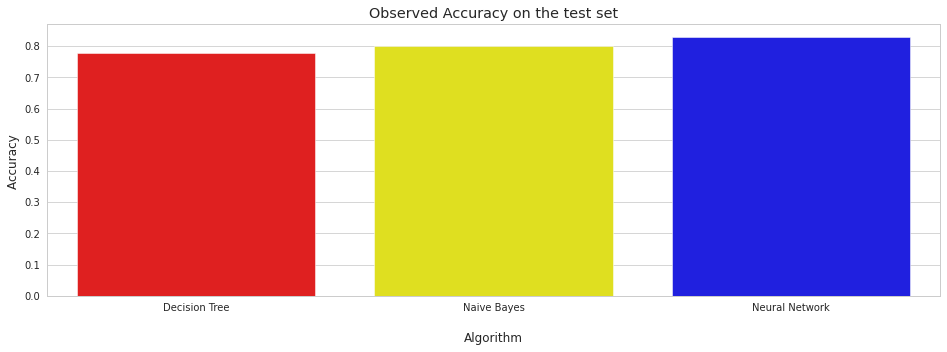

In [37]:
colors = ["red", "yellow", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.1))
plt.ylabel("Accuracy ")
plt.xlabel("\nAlgorithm")
sns.barplot(x=["Decision Tree", "Naive Bayes", "Neural Network"], y=[0.78,0.80,0.83], palette=colors)
plt.title("Observed Accuracy on the test set")
plt.show()

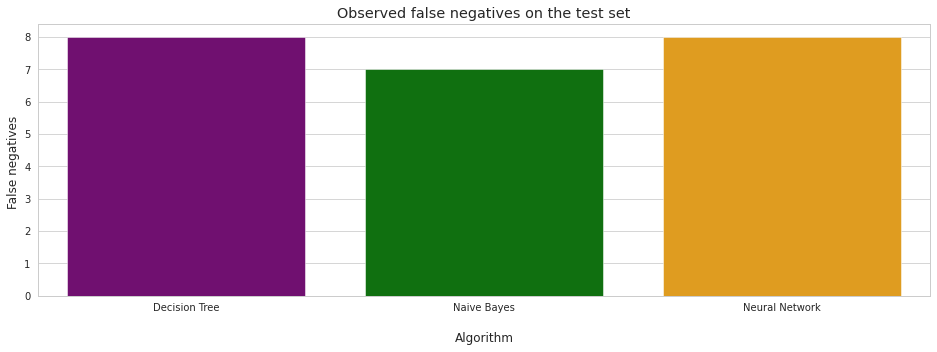

In [38]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,10,1))
plt.ylabel("False negatives ")
plt.xlabel("\nAlgorithm")
sns.barplot(x=["Decision Tree", "Naive Bayes", "Neural Network"], y=[8,7,8], palette=colors)
plt.title("Observed false negatives on the test set")
plt.show()

Comparing the results obtained, and our experience while implementing the algorithms, we conclude that:

- Naive bayes was overall the most robust model, unlike the other two models it stayed with a constant accuracy after each execution. Also it had overall really good results, based in our results it seems the best model for this problem. [1st Place]

- Neural network had theoretically the best possible results in terms of accuracy, however since we are trying to minimize the number of false negatives for this scenario, Naive Bayes outperforms it in that regard. [2nd Place]

- Decision Tree overall felt very unstable and suffered from overfitting issues when using too many depth levels, therefore an experimental approach had to be taken to find a good depth number in order to avoid overfit. [3rd Place]

Finally, we also conclude that given the high stability, the good accuracy performance and the fact that it has the lowest amount of false negatives, Neural Network seems to be the best model to tackle the heart disease prediction.